In [6]:
%matplotlib inline
import matplotlib
import requests
import matplotlib.pyplot as plt
import numpy as np


In [5]:
URL = "https://guarded-river-48081.herokuapp.com/read"
PARAMS = {} 
r = requests.get(url = URL, params = PARAMS) 
data = r.text

In [31]:
def make_plot(one_chunk, name):
    t = np.arange(len(one_chunk))
    x = [line[0] for line in one_chunk]
    y = [line[1] for line in one_chunk]
    z = [line[2] for line in one_chunk]
    plt.plot(t, x, label="x_accel")
    plt.plot(t, y, label="y_accel")
    plt.plot(t, z, label="z_accel")
    plt.title(name)
    plt.legend()
    plt.show()

In [21]:
def make_accel_plot(one_chunk, name):
    t = np.arange(len(one_chunk))
    x = [line[0] for line in one_chunk]
    y = [line[1] for line in one_chunk]
    z = [line[2] for line in one_chunk]

    w = [x[i]*x[i] + y[i]*y[i] + z[i]*z[i] for i in range(len(x))]

    plt.plot(t,w)
    plt.title(name)
    plt.show()

In [8]:
lines = data.split("\n")

In [13]:
all_data = []

for line in lines:
    info = line.split(" ")
    if len(line) < 2:
        continue
    info[1] = float(info[1])
    info[2] = float(info[2])
    info[3] = float(info[3])
    all_data.append(info)

In [14]:
state_data = {"walk":[], "still":[], "fall":[], "lie":[]}

one_chunk = []
current_state = all_data[0][0]
for line in all_data[1:]:
    if line[1] == 0 and line[2] == 0 and line[3] == 0:
        state_data[current_state].append(one_chunk)
        current_state = line[0]
        one_chunk = []
    else:
        one_chunk.append([line[1], line[2], line[3]])
state_data[current_state].append(one_chunk)

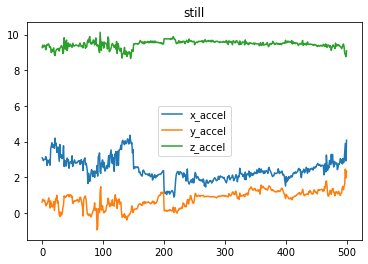

In [32]:
make_plot(state_data["still"][0], "still")

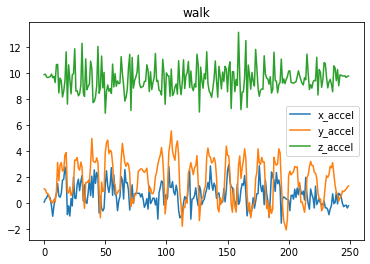

In [33]:
make_plot(state_data["walk"][0], "walk")

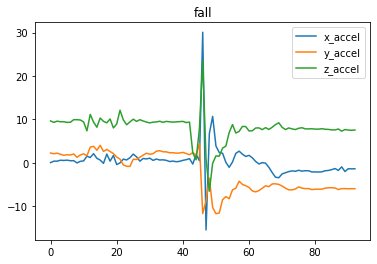

In [34]:
make_plot(state_data["fall"][0], "fall")